# Second Data AnalysisProcess

In this notebook file pairplots will be plotted

In [1]:
#Libraries are being imported
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import __version__ as matplotlibVersion
import seaborn as sns

In [2]:
#Settings for Graphic Libraries are being made
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
#Library versions are being printed
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlibVersion)
print('seaborn Version: ' + sns.__version__)

pandas Version: 1.5.2
matplotlib Version: 3.6.2
seaborn Version: 0.12.1


In [4]:
#A pandas dataframe named as dataFrame is being created by reading the data pkl file created last process
dataFrame = pd.read_pickle("../Data/DataAnalysis/FabricWaste.pkl")
dataFrame.head()

,ColorType,CustomerDefinedCategory,Maturity,Gender,ProductType,ProductTypeCategory,FabricType,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,SC,Greenish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,35,3,375,0.064198,0.014815,25,6
1,SC,Orangeish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.060386,0.007246,23,3
2,SC,Bluish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.077121,0.028278,29,11
3,SC,Bluish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.062802,0.019324,24,8
4,SC,Pinkish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.045894,0.007246,18,3


In [5]:
#Information of dataframe is being printed
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ColorType                186 non-null    object 
 1   CustomerDefinedCategory  186 non-null    object 
 2   Maturity                 186 non-null    object 
 3   Gender                   186 non-null    object 
 4   ProductType              186 non-null    object 
 5   ProductTypeCategory      186 non-null    object 
 6   FabricType               186 non-null    object 
 7   FabricCode               186 non-null    object 
 8   IsManualProcess          186 non-null    bool   
 9   Weight                   186 non-null    int64  
 10  Width                    186 non-null    int64  
 11  ProductPart              186 non-null    int64  
 12  NotchLayer               186 non-null    int64  
 13  NotchQuantity            186 non-null    int64  
 14  OrderQuantity            1

In [6]:
#Statistical information of dataframe is being printed
dataFrame.describe()

,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,165.241935,159.435484,4.801075,44.483871,2.467742,294.489247,0.047758,0.026811,13.908602,7.919355
std,36.999935,15.936653,2.289388,21.042615,0.792896,113.160409,0.028010,0.023099,8.328864,6.445527
min,125.000000,120.000000,2.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,150.000000,4.000000,31.000000,2.000000,206.250000,0.028916,0.011349,8.000000,4.000000
50%,172.500000,160.000000,4.000000,39.000000,3.000000,250.000000,0.041523,0.020425,12.000000,6.000000
75%,190.000000,171.500000,5.000000,58.000000,3.000000,380.000000,0.062802,0.035610,17.750000,10.000000
max,250.000000,180.000000,14.000000,111.000000,4.000000,640.000000,0.165803,0.165803,60.000000,42.000000


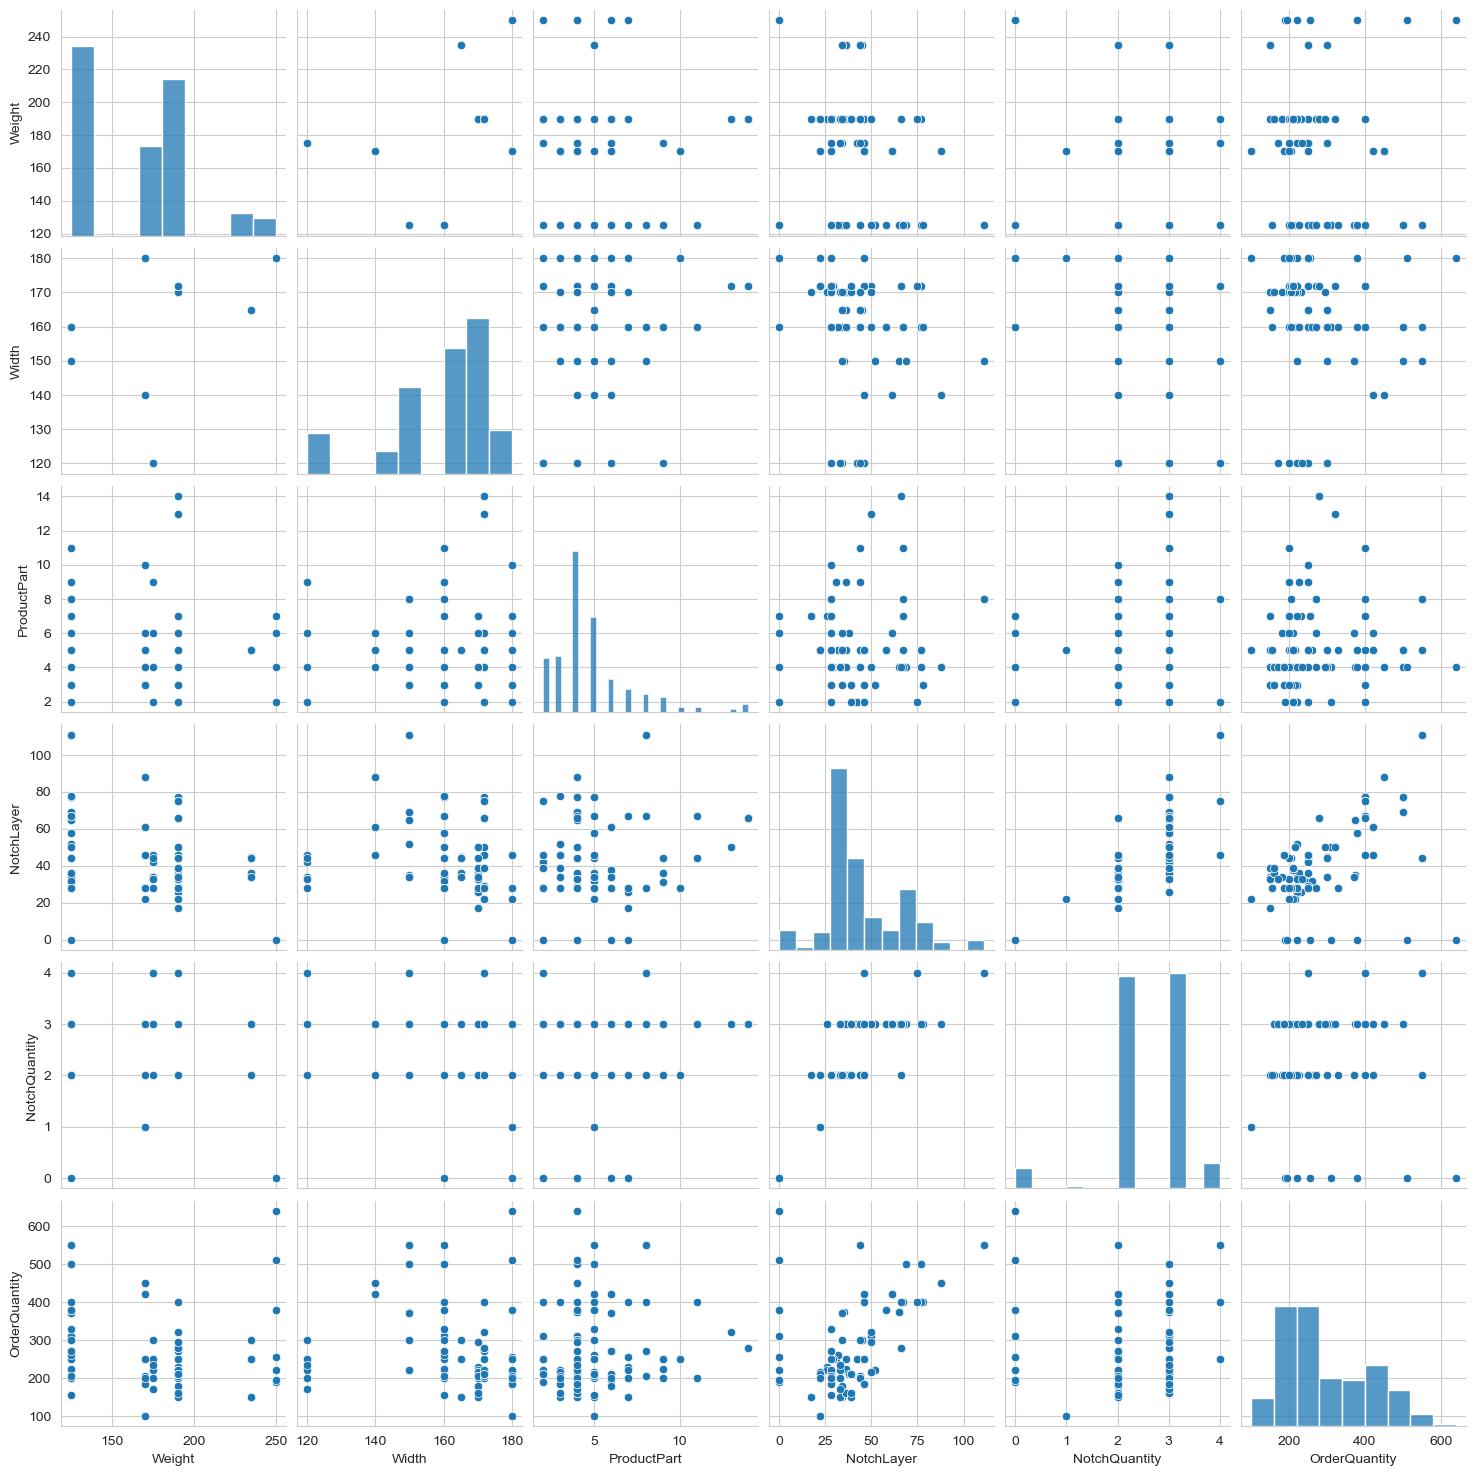

In [7]:
#Charts are being plotted to highlight the corelations between Continuous Inputs
sns.pairplot(dataFrame.loc[:, 'Weight' : 'OrderQuantity'])

### Inferences for Pairplot Continuous Inputs 

When the charts are examined, positive correlations between NotchLayer - NotchQuantity and between NotchLayer - OrderQuantity stands out.

The correlation between NotchLayer and NotchQuantity can be interpreted as more layers are created to decrease this number when notchQuantity starts to increase so Notchlayer increase too.

The correlation between NotchLayer and OrderQuantity can be interpreted as in order to produce enough products when OrderQuantity increases, preferred to increase NotchLayer instead of NotchQuantity.
In addition, the relatively low correlation between NotchQuantity and OrderQuantity can also be explained in this way.

Also, there are negative corelations between weight with NotchLayer, NotchQuantity and OrderQuantity, between width  with NotchLayer and NotchQuantity.

In addition, there is a positive correlation between OrderQuantity and almost all inputs, even if it is relatively low.
It can be thought that the reason for this is that everything, can be increased, is increased within limits as the number of products to be produced increases.

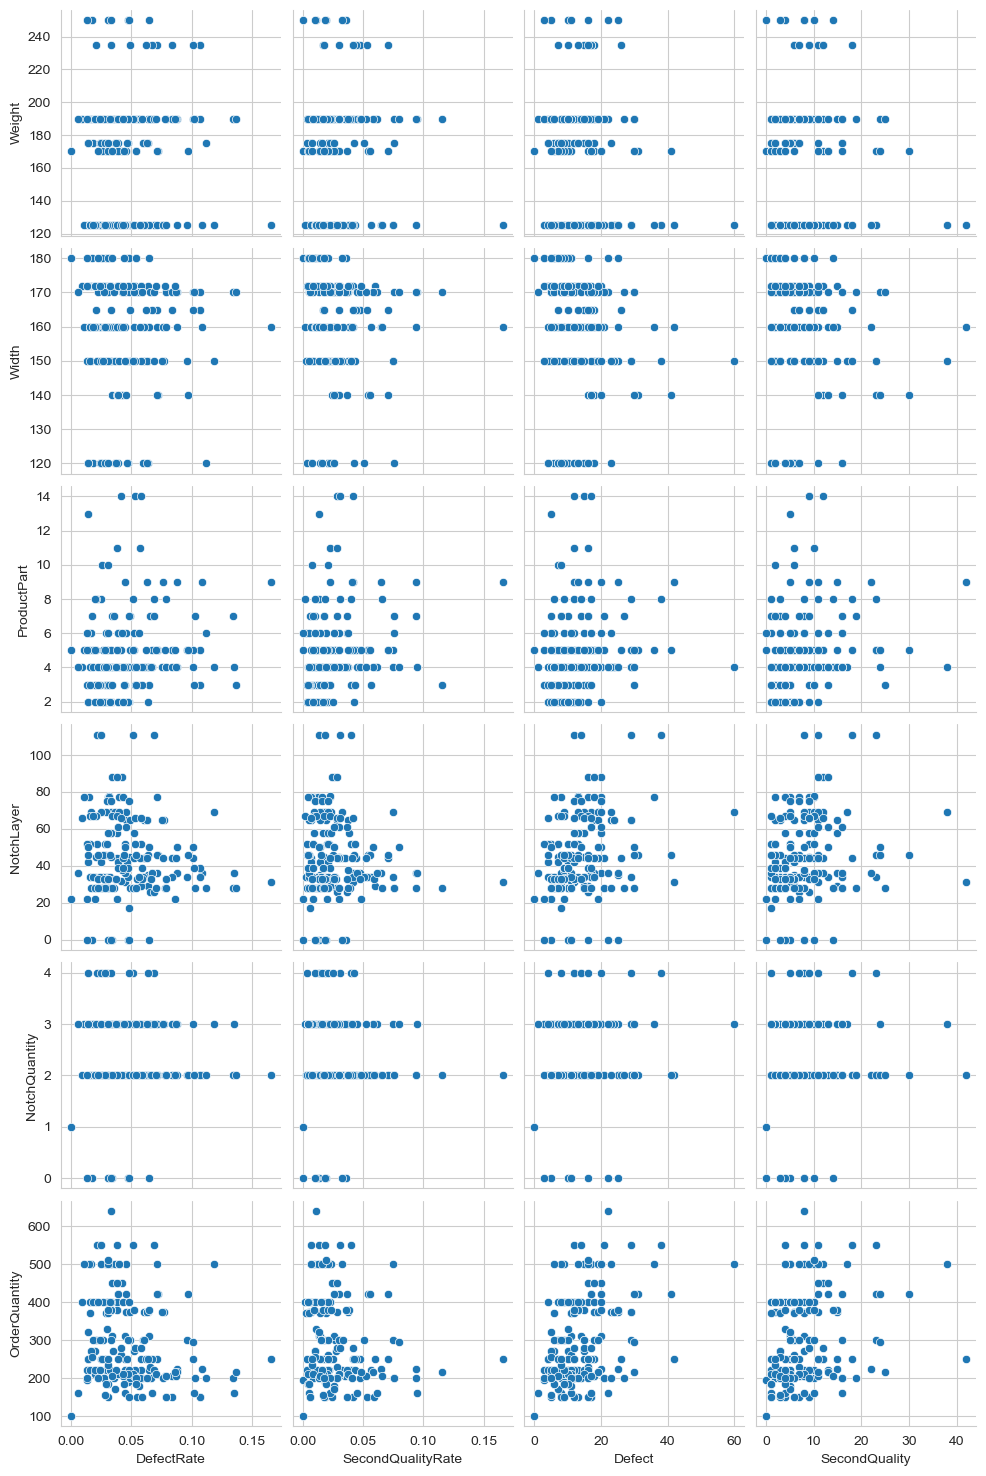

In [8]:
#Charts are being plotted to highlight the corelations between Continuous Inputs and Continuous Outputs
sns.pairplot(data = dataFrame,
             y_vars = dataFrame.loc[:, 'Weight' : 'OrderQuantity'].columns.tolist(),
             x_vars = dataFrame.loc[:,'DefectRate' :].columns.tolist())

### Inferences for Pairplot Continuous Inputs and Continuous Outputs

When the charts are examined, it can be seen that the charts of each input with all outputs, are similar.
This is becouse output data are derived from each other, so there is a high correlation between them.
This correlations will be examined later.

There is a negative correlation, albeit low, between the Width and the outputs.
In other words, the decrease in the Width feature increases the error rate, the reason for this may be  that the cutting process becomes more dificult as the Width decreases.

There is a positive correlation, albeit low, between the ProductPart and the outputs.
It can be though that, the reason for this is the error rate increases as the number of parts to be combined increases.

There is also a relatively high positive correlation between NotchLayer and outputs.
In other words, the increase in the number of layers also increases the error rate, the reason for this may be  that the cutting process becomes more dificult as the number of layers increases.

And finally there is a relatively high correlation between the OrderQuantity and the outputs.
It is pretty normal to have a high correlation between OrderQuantity with Defect and SecondQuality, as the number of defects and the number of second quality products are calculated by multiplying the OrderQuantity value with DefectRate and SecondQualityRate.

But it seems quite interesting that there is also a relatively high negative correlation between DefectRate and SecondQualityRate with OrderQuantity.
Maybe when the OrderQuantity is high, fewer mistakes had made by employees over time as they produce more of the same product.
Maybe the relationship between them is due to a third reason, such as conditions of employees for bigger jobs or a longer deadline for work.